# Churn for Bank Costumers Analysis  
M.Shumskiy 31/12/2020  
## Abstract  
In this project I analyze customer retention, determine the most relevant parameters that retain customers, implement several Machine Learning Classification Algorithms and compare to determine which better performs the classification.  
This project has application across a vast number of enterprises which concern themselves with client retention.  
It is worthy of note that this project is also of help to better plan and employ marketing campaigns to attract new customers.  
With this in mind, the work developed here is of great value.  
The analysis as well as the code is presented in this work.

## 1. Introduction  
Client retention is a subject of great importance to many enterprises, for it increases a company's performance in the market which, in turn, reflects in higher revenue and overall growth of said company.  
To extract insights related to the topic here discussed, data from existing customers and former costumers must be analyzed, with the proper tools, to determine the most relevant parameters in their decision to leave or to stay.  
Since every enterprise of success must look towards the future, Machine Learning Algorithms must be implemented to give prediction power, on which the company rely.
 
## 2. Methodology 
The method of analysis consists of the following phases:  
 1. Data Cleaning,  
 2. Exploratory Data Analysis,  
 3. Machine Learning Classification Algorithms implementation and performance comparison,  
 4. Implementation of the most accurate Classification Algorithm.  

### 2.1. The Data  
Was analyzed data from Kaggle named Churn for Bank Customers by Mehmet A. The data looks this way:

In [32]:
import pandas as pd
file_path=r'C:\Users\Pc\Desktop\Data Science\Projects\Churn for Bank Customers\churn.csv'
data=pd.read_csv(file_path)
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As you can see, the bank costumer data is composed of 10000 costumer’s info spread by 13 columns (the first being redundant).  
### 2.2. Data Cleaning
First, I checked if there were any Nan values.

In [7]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As it is observed, there are none. So now, some redundant columns need to be discarded.

In [33]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
data_3=data.copy() # copy

Now let's look at the relation between client exits.

The ration between the positive and negative outcomes of the variable Exited is  0.256


Text(0, 0.5, 'Number of occurences')

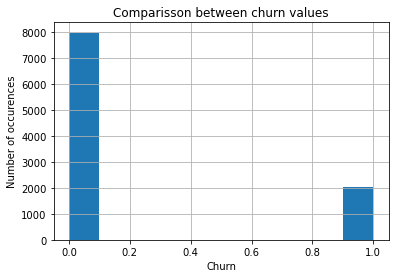

In [4]:
import matplotlib.pyplot as plt

churn_pos=len(data[data['Exited']==1])
churn_neg=len(data[data['Exited']==0])
ratio=(churn_pos/churn_neg)
print('The ration between the positive and negative outcomes of the variable Exited is ',round(ratio,3))

data['Exited'].hist()
plt.title('Comparisson between churn values')
plt.xlabel('Churn')
plt.ylabel('Number of occurences')

It is observed that 25.6 % of costumers left the bank.  
This ratio will serve as one of the criteria to determine parameter significance later on.  
Now columns as **Credit Score**,**Balance** and **Estimated Salary** must be categorized, for this let's examine the following graphs.

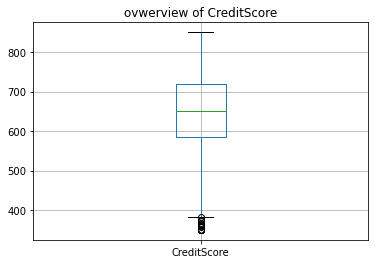

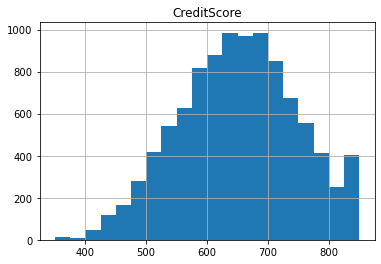

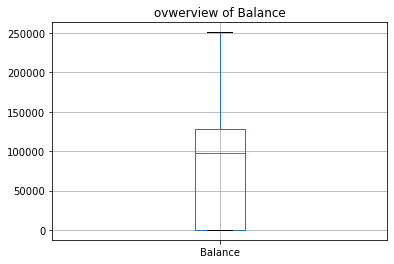

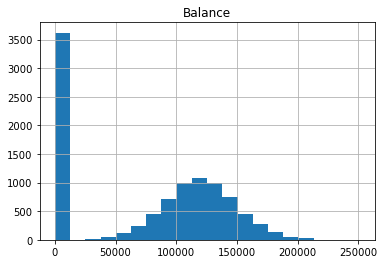

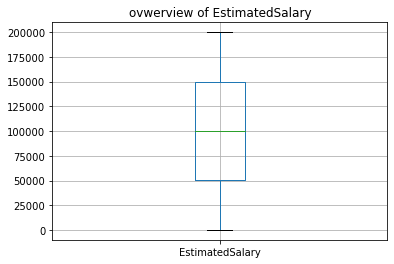

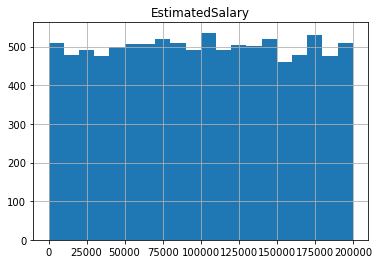

In [5]:
column=['CreditScore', 'Balance', 'EstimatedSalary']
for col in column:
    plt.title('ovwerview of {}'.format(col))
    data.boxplot(column=[col])
    data.hist(column=[col],bins=20)
    plt.show()

From the analysis of these graphs, the categorization of the parameters will follow this method: [x0 ,xf ,dx], where:  
 - x0 represents the smaller value of the parameter,  
 - xf represents the highest value of the parameter,  
 - dx represents the increment, i.e., the width of each category.  
 
And the parameters will be categorized following these values:  
 - Credit Score: [350, 850, 25],  
 - Balance: [0, 260000, 15000],  
 - Estimated Salary: [0, 200000, 25000]  
 
But first, the following functions will be created:  
 - **bin_creator** : creates the slices,  
 - **label_creator** : creates the labels for the slices.  
 
And the values of **Balance** and **Estimated Salary** will be rounded.

In [34]:
def bin_creator(x0,xf,dx):
    bins=[x0]
    n_bins=abs(xf-x0)//dx
    i=1
    while i<=n_bins:
        bins.append(bins[i-1]+dx)
        i+=1
    return bins
def label_creator(x0,xf,dx):
    labels=[]
    n_bins=abs(xf-x0)//dx
    i=1
    while i<=n_bins:
        labels.append('{},{}'.format(str(x0+(i-1)*dx),str(x0+i*dx)))
        i+=1
    return labels
data.Balance=data.Balance.round(0)
data.EstimatedSalary=data.EstimatedSalary.round(0)

Now let's categorize the data

In [35]:
values=[[350,850,25],[0,260000,15000],[0,200000,25000]]
columns=['CreditScore','Balance','EstimatedSalary']
i=0
for column in columns:
    category=pd.cut(data[column],bins=bin_creator(values[i][0],values[i][1],values[i][2]),labels=label_creator(values[i][0],values[i][1],values[i][2]))
    data.insert(11+i,'{} cat'.format(column),category)
    i+=1
data['Balance cat'].fillna('0,15000',inplace=True) # where balance=0 the category will be Nan
data.drop(columns=['CreditScore','Balance','EstimatedSalary'],inplace=True)
data.head()

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore cat,Balance cat,EstimatedSalary cat
0,France,Female,42,2,1,1,1,1,"600,625","0,15000","100000,125000"
1,Spain,Female,41,1,1,0,1,0,"600,625","75000,90000","100000,125000"
2,France,Female,42,8,3,1,0,1,"500,525","150000,165000","100000,125000"
3,France,Female,39,1,2,0,0,0,"675,700","0,15000","75000,100000"
4,Spain,Female,43,2,1,1,1,0,"825,850","120000,135000","75000,100000"


Now the dataframe is more friendly to analyze.  
### 2.3. Exploratory Data Analysis  
Lets take a look at the information that lies in the dataframe.

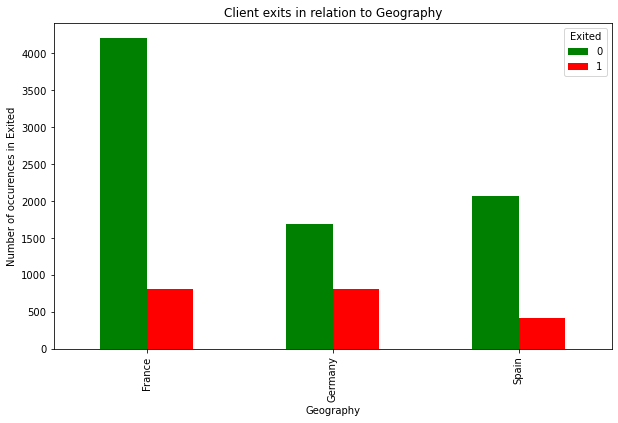

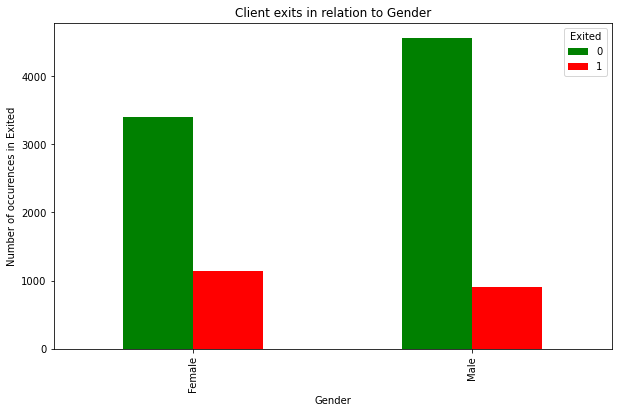

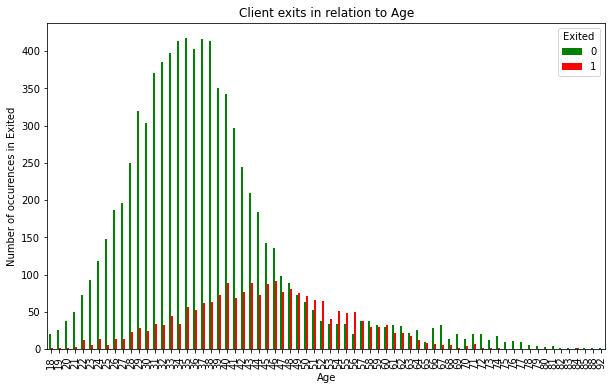

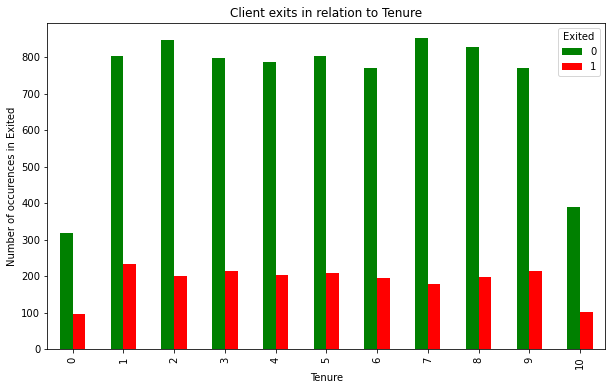

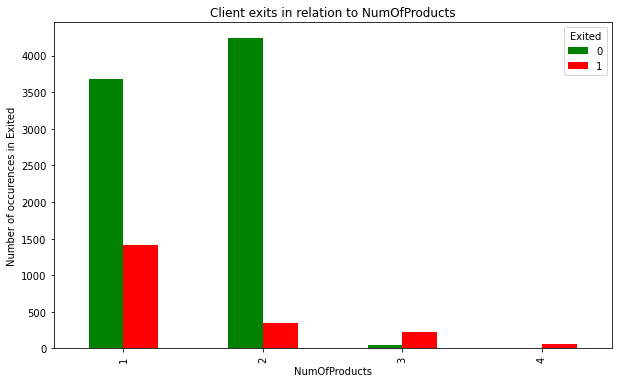

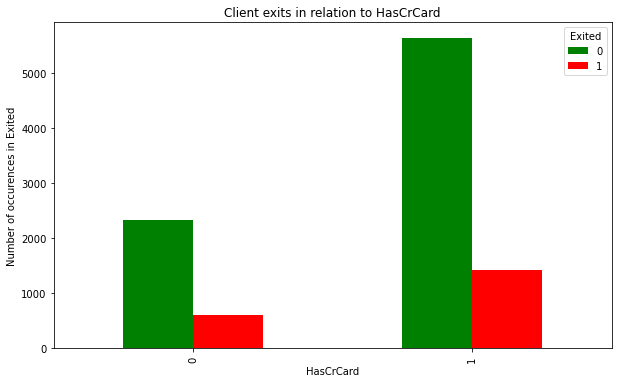

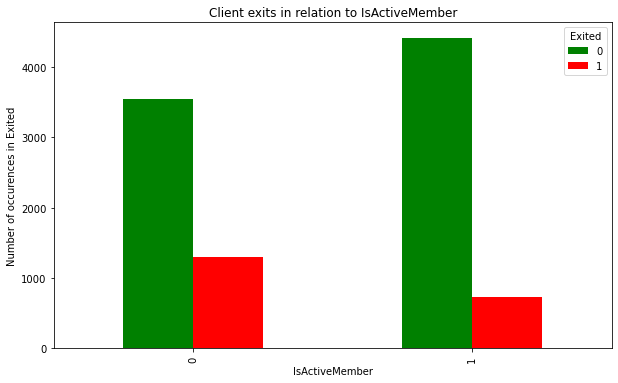

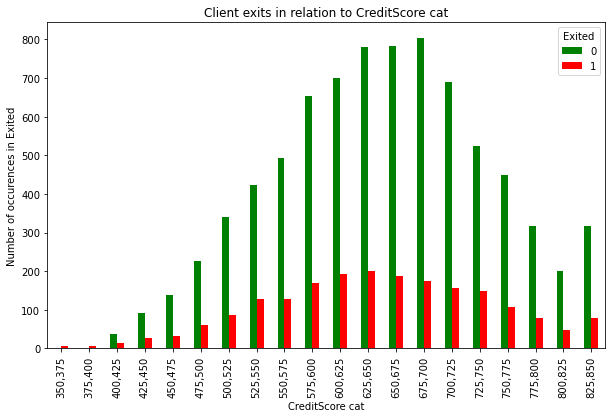

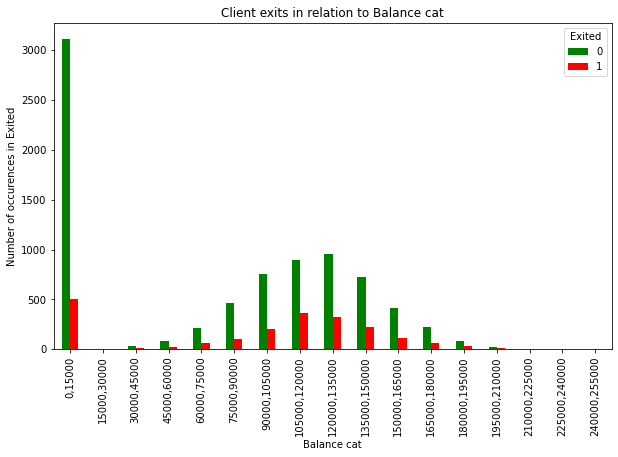

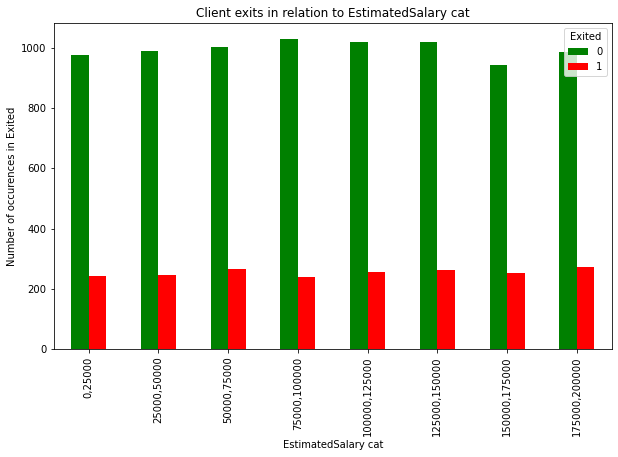

In [23]:
import seaborn as sns

for col in ['Geography', 'Gender', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember','CreditScore cat','Balance cat','EstimatedSalary cat',
       'Exited']:
    if col=='Exited':
        break
    else:
        pd.crosstab(data[col],data['Exited']).plot(kind='bar',color=['g','r'],figsize=(10, 6))
        plt.title('Client exits in relation to {}'.format(col))
        plt.xlabel(col)
        plt.ylabel('Number of occurences in Exited')
        plt.show()

From the analysis of the graphics we can see the following:  
 - Geography: the French tend to stay with the bank,  
 - Gender: males tend to stay with the bank,  
 - Age: There seem to be 2 distributions, apparently Poisson distributions with 2 different average values for those clients who stayed and those who left,  
 - Tenure: does not seem to be related to exits,  
 - NumOfProducts: People with 2 products tend to stay,  
 - HasCrCard: presence of a credit card does not seem to affect the exits,  
 - IsActiveMember: active members seem to stay but the difference is small,  
 - CreditScore cat: credit score does not seem to affect the exists (all data entries follow the ratio between exits and stays),  
 - Balance cat: balance does not seem to affect the exists (all data entries follow the ratio between exits and stays),  
 - EstimatedSalary cat: estimated salary does not seem to affect the exists (all data entries follow the ratio between exits and stays).  
 
With these points in mind, we can predict that the most relevant factors in the decision to stay or leave will be:  
 - Age,  
 - Activity,  
 - Gender,  
 - Geography.  
 
To calculate correlation, we need to convert string values to integer values. To do such, we must prepare the dataframe:  
 - The categorical columns (Balance cat, CreditScore cat, EstimatedSalary cat) must be converted to integer,  
 - Any Nan values must be dealt with.

In [36]:
data_4=data_3
def bin_creator(x0,xf,dx):
    bins=[x0]
    n_bins=abs(xf-x0)//dx
    i=1
    while i<=n_bins:
        bins.append(bins[i-1]+dx)
        i+=1
    return bins
def label_creator(x0,xf,dx):
    labels=[]
    n_bins=abs(xf-x0)//dx
    i=1
    while i<=n_bins:
        labels.append(str(i-1)) #here is the change. This gives an integer instead of interval
        i+=1
    return labels
values=[[350,850,25],[0,260000,15000],[0,200000,25000]]
columns=['CreditScore','Balance','EstimatedSalary']
i=0
for column in columns:
    category=pd.cut(data_3[column],bins=bin_creator(values[i][0],values[i][1],values[i][2]),labels=label_creator(values[i][0],values[i][1],values[i][2]))
    data_4.insert(11+i,'{} cat'.format(column),category)
    i+=1
    
data_4['Balance cat'].fillna('0',inplace=True)
data_4['CreditScore cat'].fillna('0',inplace=True)

data_map_geo={'France':0,'Germany':1,'Spain':2}
data_map_gender={'Female':0,'Male':1}
data_map_credscore={}
data_4['Geography'],data_4['Gender']=data_4['Geography'].map(data_map_geo),data_4['Gender'].map(data_map_gender)

data_5=data_4[['Geography', 'Gender', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember','CreditScore cat', 'Balance cat', 'EstimatedSalary cat','Exited']]
data_5=data_5.astype({'Balance cat': 'int64','CreditScore cat':'int64','EstimatedSalary cat':'int64'})

data_5.head()

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore cat,Balance cat,EstimatedSalary cat,Exited
0,0,0,42,2,1,1,1,10,0,4,1
1,2,0,41,1,1,0,1,10,5,4,0
2,0,0,42,8,3,1,0,6,10,4,1
3,0,0,39,1,2,0,0,13,0,3,0
4,2,0,43,2,1,1,1,19,8,3,0


Now the dataframe is suited for correlation calculation.

In [37]:
# create a dataframe only for the parameters
data_6=data_5[['Geography', 'Gender', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember','CreditScore cat', 'Balance cat', 'EstimatedSalary cat']]

Text(0.5, 1.0, 'Absolute Correlation between parameters and Exits')

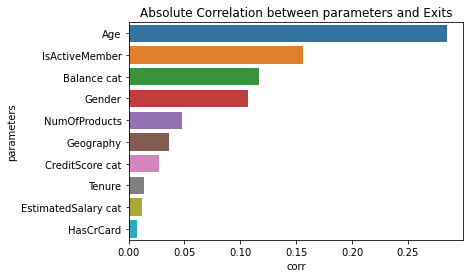

In [38]:
abscorwithdep=[]
for var in data_6.columns:
    if var=='Exited':
        break
    else:
        abscorwithdep.append((abs(data_5['Exited'].corr(data_6[var]))))
    
parameters=data_6.columns.to_list()
corr_table={'parameters':parameters,
           'corr':abscorwithdep}

corr_table_df=pd.DataFrame.from_dict(corr_table)
corr_table_df.sort_values('corr', ascending=False,inplace=True)

sns.barplot(x='corr',y='parameters',data=corr_table_df)
plt.title('Absolute Correlation between parameters and Exits')

Text(0.5, 1.0, 'Correlation matrix between parameters')

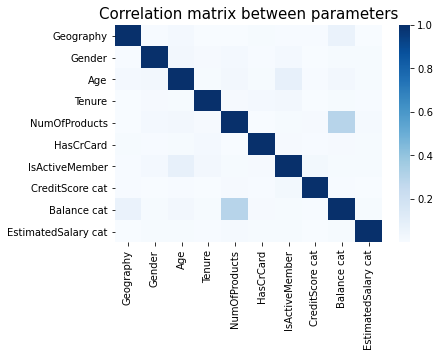

In [40]:
plt.figure()
correlation_matrix = data_6.corr().abs()
sns.heatmap(correlation_matrix,cmap='Blues')
plt.title('Correlation matrix between parameters',fontsize=15)

It appears that there are no crossed correlations between parameter, so no corrections must be made here.  
Having in mind the small percentage of clients that left the bank, I implement the SMOTE (Synthetic Minority Oversampling Technique) to correct the discrepancy.

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X=data_6
Y=data['Exited']

os=SMOTE(random_state=0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
columns=X_train.columns

os_data_X,os_data_Y=os.fit_sample(X_train,Y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_Y=pd.DataFrame(data=os_data_Y,columns=['Exited'])

print('lenght of oversampled data is',len(os_data_X))
print('lenght of exits=0 in oversampled data',len(os_data_Y[os_data_Y['Exited']==0]))
print('proportion of exits=0 data in oversampled data is ',len(os_data_Y[os_data_Y['Exited']==0])/len(os_data_X))
print('proportion of exits=1 data in oversampled data is ',len(os_data_Y[os_data_Y['Exited']==1])/len(os_data_X))

lenght of oversampled data is 11944
lenght of exits=0 in oversampled data 5972
proportion of exits=0 data in oversampled data is  0.5
proportion of exits=1 data in oversampled data is  0.5


So, the data is as clean as it can get and corrected for exits discrepancies for Machine Learning Algorithms implementation.  

### 2.4 Machine Learning Classification Algorithms implementation and performance comparison  
The classification algorithms to be used are the following:  
 - Naive Bayes,  
 - Random Forest Classifier,   
 - Logistic Regression Classifier,  
 - K Nearest Neighbors.

#### 2.4.1. Naive Bayes

In [41]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(os_data_X, os_data_Y)
y_pred=nb.predict(X_test)

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1991
           1       0.41      0.63      0.49       509

    accuracy                           0.74      2500
   macro avg       0.65      0.70      0.66      2500
weighted avg       0.79      0.74      0.76      2500



C:\Users\Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### 2.4.2. Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(os_data_X, os_data_Y)
y_pred=clf.predict(X_test)

print(classification_report(Y_test,y_pred))

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1991
           1       0.55      0.65      0.60       509

    accuracy                           0.82      2500
   macro avg       0.73      0.76      0.74      2500
weighted avg       0.83      0.82      0.83      2500



#### 2.4.3. Logistic Regression Classifier

In [43]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(os_data_X,os_data_Y)
y_pred=logreg.predict(X_test)

print(classification_report(Y_test,y_pred))

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1991
           1       0.37      0.60      0.46       509

    accuracy                           0.71      2500
   macro avg       0.63      0.67      0.63      2500
weighted avg       0.78      0.71      0.74      2500



C:\Users\Pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 2.4.4. K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2).fit(os_data_X, os_data_Y)
y_pred=knn.predict(X_test)    

print(classification_report(Y_test,y_pred))

C:\Users\Pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1991
           1       0.34      0.35      0.35       509

    accuracy                           0.73      2500
   macro avg       0.59      0.59      0.59      2500
weighted avg       0.73      0.73      0.73      2500



#### 2.4.5. Comparison of the models

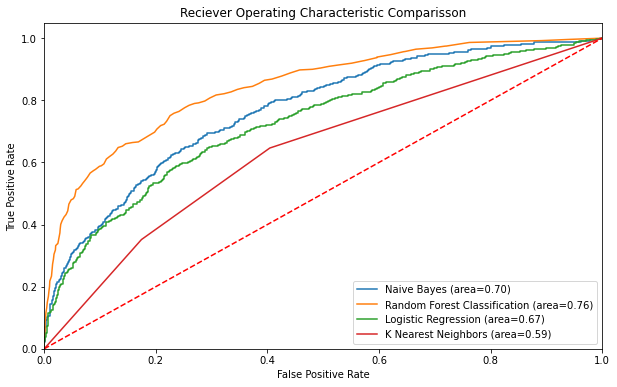

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Naive Bayes
nb_roc_auc=roc_auc_score(Y_test,nb.predict(X_test))
fpr_nb,tpr_nb,thresholds_nb=roc_curve(Y_test,nb.predict_proba(X_test)[:,1])
# Random Forest
rf_roc_auc=roc_auc_score(Y_test,clf.predict(X_test))
fpr_rf,tpr_rf,thresholds_rf=roc_curve(Y_test,clf.predict_proba(X_test)[:,1])

# Logistic Regression
logit_roc_auc=roc_auc_score(Y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(Y_test,logreg.predict_proba(X_test)[:,1])

# K Nearest Neighbors
knn_roc_auc=roc_auc_score(Y_test,knn.predict(X_test))
fpr_knn,tpr_knn,thresholds_knn=roc_curve(Y_test,knn.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes (area=%0.2f)' % nb_roc_auc)
plt.plot(fpr_rf,tpr_rf,label='Random Forest Classification (area=%0.2f)' % rf_roc_auc)
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot(fpr_knn,tpr_knn,label='K Nearest Neighbors (area=%0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Comparisson')
plt.legend(loc='lower right')
plt.show()

It can be seen that the **Random Forest Classifier** outperforms the other models and it's this model that will be selected.

## 3. Results  
From the Exploratory Data Analysis, the correlation between parameters and exists is displayed in the following graph:

Text(0.5, 1.0, 'Absolute Correlation between parameters and Exits')

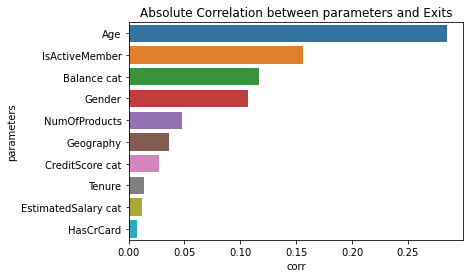

In [46]:
sns.barplot(x='corr',y='parameters',data=corr_table_df)
plt.title('Absolute Correlation between parameters and Exits')

And the performance of several Machine Learning algorithms is displayed on the following graph:

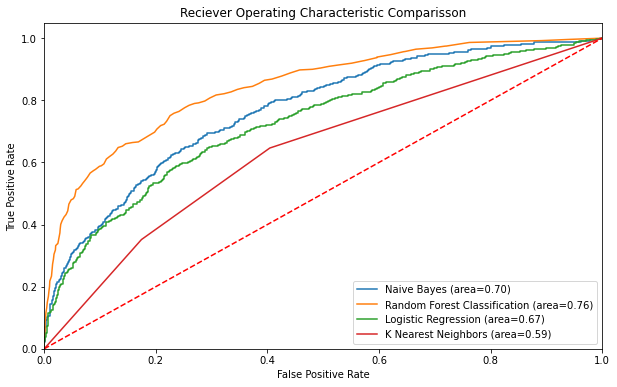

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes (area=%0.2f)' % nb_roc_auc)
plt.plot(fpr_rf,tpr_rf,label='Random Forest Classification (area=%0.2f)' % rf_roc_auc)
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot(fpr_knn,tpr_knn,label='K Nearest Neighbors (area=%0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Comparisson')
plt.legend(loc='lower right')
plt.show()

## 4. Conclusion  
This project was developed with the intent to determine the most relevant parameters in client exits, as well as implementation of the Machine Learning model with best performance.  
The parameters with most relevance for the client decision to either leave or stay are ordered as follow:  
 1. Age, the younger people tend to stay and displayed interesting distributions worth examining in the future,  
 2. Level of Activity, the more active members tend to stay,  
 3. Account Balance, clients with lower balance tend to stay,  
 4. Gender, the men tend to stay more than women.  
 
As for the Machine Learning model, the **Random Forest Classifier** performed the best, therefore, it shall be the model to be implemented.  
It is worth to note of the uses of this project. With this information the bank can determine it's focus points to retain clients, as well as to direct its marketing campaigns to acquire new ones. This work can be, easily, applied to other enterprises.
### 5. References  
 - Metrics to Evaluate your Machine Learning Algorithm by Aditya Mishra,  
 - An in-depth guide to supervised machine learning classification by Badreesh Shetty,  
 - Python Data Science Handbook by Jake VanderPlas,  
 - Personnel / Client Retention Study by M.Shumskiy